In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
books=cv2.imread('books.jpg')
global books

In [3]:
def warp(size,inverseH):
    a=size[0]
    b=size[1]
    
    matrix=np.zeros((a,b,3))

    
    for x in range(0,a):
        for y in range(0,b):
            t=bilinear(x,y,inverseH)
            for i in range(0,3):
                matrix[x][y][i]=t[i]
            
            
    return matrix

In [4]:
def bilinear(x,y,invH):
    t=inverseH(x,y,invH)
    x=t[0]
    y=t[1]
    
    global books
    original=books
    
    x1=int(round(x))
    x2=int(round(x))+1
    y1=int(round(y))
    y2=int(round(y))+1
    
    w1=(x2-x)[0]
    w2=(x-x1)[0]
    r1=(y2-y)[0]
    r2=(y-y1)[0]
    
    b=original[:,:,0]
    g=original[:,:,1]
    r=original[:,:,2]

    X=np.array([[w1,w2]])
    Y=np.array([[r1],
                [r2]])
    
    s=1/((x2-x1)*(y2-y1))
    
    try:
        fb=np.array([[(b[x1][y1]),(b[x1][y2])],
                 [(b[x2][y1]),(b[x2][y2])]])
        
        fg=np.array([[(g[x1][y1]),(g[x1][y2])],
                 [(g[x2][y1]),(g[x2][y2])]])
        
        fr=np.array([[(r[x1][y1]),(r[x1][y2])],
                    [(r[x2][y1]),(r[x2][y2])]])
        
        b1=np.multiply(s,X.dot(fb.dot(Y)))
        g1=np.multiply(s,X.dot(fg.dot(Y)))
        r1=np.multiply(s,X.dot(fr.dot(Y)))
        
        final=[b1,g1,r1]   

    except IndexError:
        final=[0,0,0]
        
        
    return final   

In [5]:
def inverseH(x,y,invH):
    v=[[x],
      [y],
      [1]]
    v=np.array(v)
    
    r=invH.dot(v)
    
    w=r[2]
    x1=r[0]/w
    y1=r[1]/w
    
    return [x1,y1]

In [6]:
#yellow book

a1=int(np.sqrt((665-602)**2 +(392-210)**2))*2
b1=int(np.sqrt((381-665)**2 +(210-107)**2))*2

src = np.float32([[107,381],[287,319],[392,602],[210,665]])
dst = np.float32([[b1, 0], [b1, a1], [0,a1],[0, 0]])

h1, status = cv2.findHomography(src,dst)

h1_inverse = np.linalg.inv(h1)

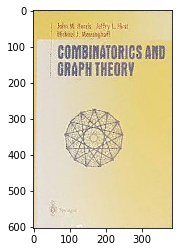

In [7]:
result1=warp((b1,a1),h1_inverse)
result1=result1.astype(int)
cv2.imwrite("res04.jpg",result1)
b,g,r=cv2.split(result1)
result1=cv2.merge([r,g,b])
plt.imshow(result1)

In [8]:
#black book
a2=int(np.sqrt((970-1099)**2 +(808-610)**2))
b2=int(np.sqrt((970-675)**2 +(808-618)**2))

src = np.float32([[675,618],[ 796,425],[ 1099,610],[970,808]])
dst = np.float32([[b2, 0], [b2, a2], [0,a2],[0, 0]])

h2, status = cv2.findHomography(src,dst)

h2_inverse = np.linalg.inv(h2)

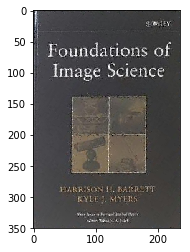

In [9]:
result2=warp((b2,a2),h2_inverse)
result2=result2.astype(int)
cv2.imwrite("res05.jpg",result2)
b,g,r=cv2.split(result2)
result2=cv2.merge([r,g,b])
plt.imshow(result2)

In [10]:
#b&w book
a3=int(np.sqrt((738-706)**2 +(355-153)**2))
b3=int(np.sqrt((738-462)**2 +(355-402)**2))

src = np.float32([[462,402],[ 425,204],[ 706,153],[738,355]])
dst = np.float32([[b3, 0], [b3, a3], [0,a3],[0, 0]])

h3, status = cv2.findHomography(src,dst)

h3_inverse = np.linalg.inv(h3)

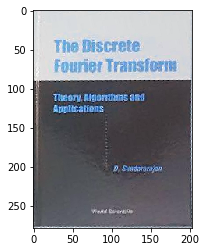

In [11]:
result3=warp((b3,a3),h3_inverse)
result3=result3.astype(int)
cv2.imwrite("res06.jpg",result3)
b,g,r=cv2.split(result3)
result2=cv2.merge([r,g,b])
plt.imshow(result3)